Задача: [Сумма соседей](https://stepik.org/lesson/3369/step/10?unit=952)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

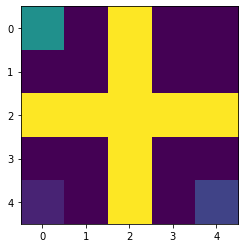

In [3]:
# Что такоей картинка?
img = [
    [0.5, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0.1, 0, 1, 0, 0.2],
]

plt.imshow(img)

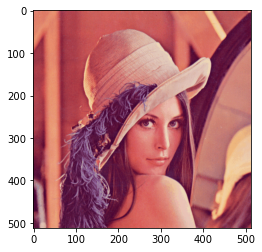

In [4]:
# source: http://www.lenna.org/
img = mpimg.imread('./lena_color.gif')
plt.imshow(img)

In [5]:
print(img)

[[[222 133 121 255]
  [222 133 121 255]
  [226 137 129 255]
  ...
  [226 145 121 255]
  [218 121 105 255]
  [198  93  89 255]]

 [[222 133 121 255]
  [222 133 121 255]
  [226 137 129 255]
  ...
  [226 145 121 255]
  [218 121 105 255]
  [198  93  89 255]]

 [[222 133 121 255]
  [222 133 121 255]
  [226 137 129 255]
  ...
  [226 145 121 255]
  [218 121 105 255]
  [198  93  89 255]]

 ...

 [[ 80  16  56 255]
  [ 80  16  56 255]
  [ 89  20  52 255]
  ...
  [170  64  80 255]
  [174  64  72 255]
  [170  56  72 255]]

 [[ 80  16  56 255]
  [ 80  16  56 255]
  [ 93  24  64 255]
  ...
  [178  68  76 255]
  [178  68  76 255]
  [182  68  76 255]]

 [[ 80  16  56 255]
  [ 80  16  56 255]
  [ 93  24  64 255]
  ...
  [178  68  76 255]
  [178  68  76 255]
  [182  68  76 255]]]


In [6]:
def get_channel(img, channel=0):
    width, height, _ = img.shape
    data = []
    for row in range(height):
        data.append([])
        for col in range(width):
            data[-1].append(int(img[row][col][channel]))
    return data

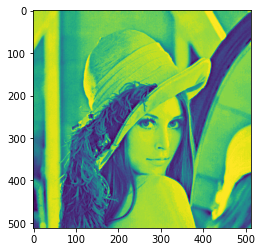

In [9]:
plt.imshow(get_channel(img, 0))

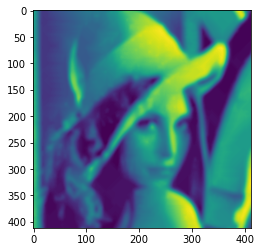

In [10]:
"""
Эквивалентно оператору
1/9 * [
[0.5, 1, 1], 
[1, 1, 1], 
[1, 1, 1]]
"""
c = get_channel(img, 1)

for i in range(50):
    result = []
    for row in range(1, len(c) - 1):
        result.append([])
        for col in range(1, len(c[0]) - 1):
            s = c[row - 1][col] + c[row + 1][col] + c[row][col - 1] + c[row][col + 1] + c[row][col]
            result[-1].append(s // 5)

    c = result        

plt.imshow(result)

In [11]:
def apply_kernel(image, kernel):
    margin = len(kernel) // 2
    result = []
    for row in range(margin, len(c) - margin):
        result.append([])
        for col in range(margin, len(c[0]) - margin):
            s = 0
            for i in range(len(kernel)):
                for j in range(len(kernel[0])):
                    s += image[row + i - margin][col + j - margin] * kernel[i][j]
            result[-1].append(s)
    return result

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


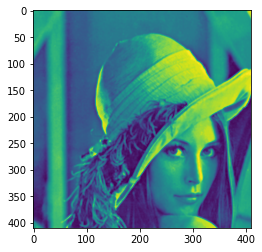

In [12]:
blur3x3 = np.ones((3, 3)) / 9
print(blur3x3)
_t = apply_kernel(get_channel(img, 1), blur3x3)
plt.imshow(_t)

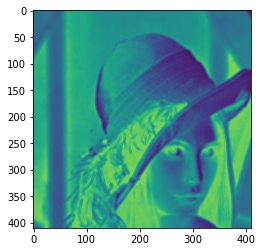

In [13]:
ridge_detection = [[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]]
_t = apply_kernel(get_channel(img, 1), ridge_detection)
plt.imshow(_t)

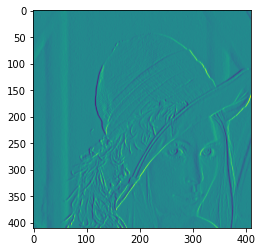

In [14]:
vertical_edge_detection = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
_t = apply_kernel(get_channel(img, 1), vertical_edge_detection)
plt.imshow(_t)

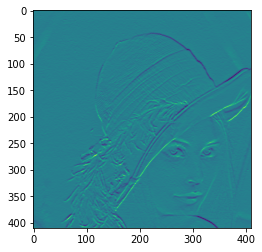

In [15]:
horizonal_edge_detection = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
_t = apply_kernel(get_channel(img, 1), horizonal_edge_detection)
plt.imshow(_t)

In [ ]:
# Additional reading:
# - https://en.wikipedia.org/wiki/Kernel_(image_processing)
# - https://en.wikipedia.org/wiki/Sobel_operator